In [1]:
# import stuff
import numpy as np
import fractions
import math
import matplotlib.pyplot as plt

In [2]:
def C(m,n):
    
    return math.factorial(m)/(math.factorial(n) * math.factorial(m-n))


In [3]:
def calc_likelihood(n,p):
    likelihood=[]
    for Pi in p:
        bernoulli = C(10,n) * np.power(Pi,n) * np.power(1-Pi,10-n)
        likelihood.append(bernoulli)
        
    return likelihood

In [4]:
def calc_px(prior,likelihood):
    px = 0.0
    for i in range(0,11):
        px += (prior[i]*likelihood[i])
        
    return px

In [5]:
def calc_posterior(prior,likelihood,px):
    posterior = []
    for i in range(0,11):
        postr = prior[i] * likelihood[i] / px
        posterior.append(postr)
    
    return posterior

In [6]:
def drawgraph(p,posterior,i):
    x = np.arange(11) # position of each bar on x-axis
    
    plt.xticks(x,p)
    plt.ylim([0.0,1.0])
    
    plt.bar(x,posterior)
    plt.title('posterior')
    
    plt.show()
    plt.savefig('%d toss.png' % i)
    print('Figure saved to \'%d toss.png\'.' % i)

In [7]:
def estimate(coin,prior,p):
    n = sum(coin) # number of heads
    
    likelihood = calc_likelihood(n,p)
    #print('Likelihood = ',likelihood)
    
    px = calc_px(prior,likelihood)
    #print("p(x) = %.5f" % px)
    
    posterior = calc_posterior(prior,likelihood,px)
    #print("Posterior = ",posterior)
    
    return posterior
    

In [8]:
def coin_sim():
    # weighted random to obtain p
    p = np.random.choice([i/10 for i in range(0,11)],p=[1/11 for i in range(0,11)])
    #print('Probability of tossing a head is %.1f' % p)
    
    # coin event: 1 = head, 0 = tail
    # toss 10 coins
    coin = []
    for i in range(0,10):
        c = np.random.choice([1,0],p=[p,1-p])
        coin.append(c)
    
    #print('Coin outcome: ',coin)
    return coin

In [9]:
def main():
    # range of possibilities of tossing a head = sample space of p
    p = [i/10 for i in range(0,11)]
    
    # probablity that Pi is the probability of tossing a head = p(p) = prior
    prior = [fractions.Fraction('1/11').limit_denominator() for i in range(0,11)]
    
    print('Assuming the initial distribution of the prior is [',prior[0],end='')
    for x in prior[1:]: print(',',x,end='')
    print(' ]',end='\n\n')
    
    # convert fraction back to float
    prior = [float(prior_i) for prior_i in prior]
    
    
    for i in range(1,51):
        # coin outcome
        coin = coin_sim()
        
        # calculate posterior
        posterior=estimate(coin,prior,p)
        
        # draw graph?
        if i%10==0: 
            print('~'*15,' %d iteration ' % i,'~'*15)
            drawgraph(p,posterior,i)
            
        # update prior
        prior = posterior

Assuming the initial distribution of the prior is [ 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11 ]

~~~~~~~~~~~~~~~  10 iteration  ~~~~~~~~~~~~~~~


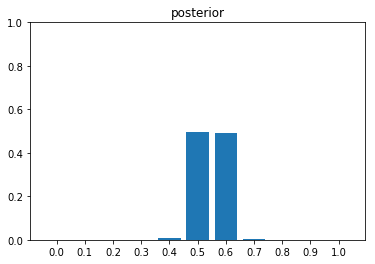

Figure saved to '10 toss.png'.
~~~~~~~~~~~~~~~  20 iteration  ~~~~~~~~~~~~~~~


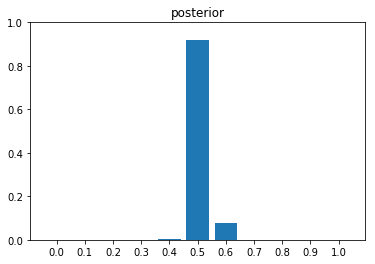

Figure saved to '20 toss.png'.
~~~~~~~~~~~~~~~  30 iteration  ~~~~~~~~~~~~~~~


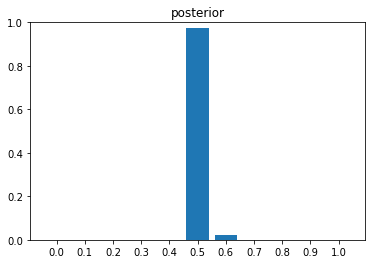

Figure saved to '30 toss.png'.
~~~~~~~~~~~~~~~  40 iteration  ~~~~~~~~~~~~~~~


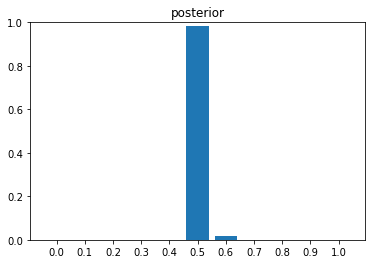

Figure saved to '40 toss.png'.
~~~~~~~~~~~~~~~  50 iteration  ~~~~~~~~~~~~~~~


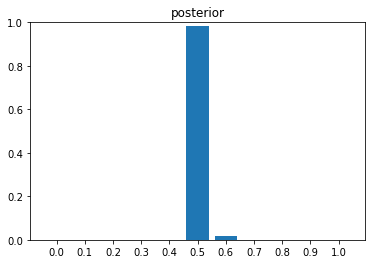

Figure saved to '50 toss.png'.


In [10]:
if __name__ == '__main__':
    main()